In [1]:
import pandas as pd    
import numpy as np
from sklearn.model_selection import train_test_split  

In [12]:
date = [2020, 2021, 2022, 2023, 2024]
LPD = []
for i in date :
    df = pd.read_csv(f'D:/LPD_total/LPD_5/LPD_{i}.csv')
    print(len(df))
    LPD.append(df)
    print(len(LPD))
    
LPD_df = pd.concat(LPD, ignore_index=True)
print(LPD_df.info())
display(LPD_df.head())
display(LPD_df.tail())

4514782
1
4571619
2
4589933
3
4589033
4
4600283
5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22865650 entries, 0 to 22865649
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   기준일ID         int64  
 2   시간대구분         int64  
 3   집계구코드         int64  
 4   총생활인구수        float64
 5   10gen_male    float64
 6   10gen_female  float64
 7   20gen_male    float64
 8   20gen_female  float64
 9   30gen_male    float64
 10  30gen_female  float64
 11  40gen_male    float64
 12  40gen_female  float64
 13  50gen_male    float64
 14  50gen_female  float64
 15  60gen_male    float64
 16  60gen_female  float64
dtypes: float64(13), int64(4)
memory usage: 2.9 GB
None


,Unnamed: 0,기준일ID,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
0,0,20200101,17,1125066010015,2750.0,88.0,90.0,215.0,271.0,182.0,230.0,194.0,269.0,164.0,277.0,147.0,211.0
1,1,20200101,15,1125073020007,979.0,24.0,45.0,65.0,83.0,86.0,75.0,71.0,79.0,70.0,69.0,58.0,63.0
2,2,20200101,15,1125073030011,178.0,6.0,7.0,9.0,11.0,10.0,14.0,12.0,15.0,12.0,15.0,10.0,11.0
3,3,20200101,15,1125073030012,7716.0,280.0,333.0,721.0,734.0,598.0,586.0,557.0,552.0,425.0,688.0,403.0,553.0
4,4,20200101,15,1125073030301,527.0,26.0,29.0,30.0,34.0,34.0,43.0,34.0,47.0,38.0,41.0,31.0,36.0


,Unnamed: 0,기준일ID,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
22865645,4600278,20241231,8,1101063040001,4493.0950,36.21680,28.131600,195.78700,246.33331,398.126900,248.4810,682.672000,302.117800,648.645500,447.7362,411.240500,334.738200
22865646,4600279,20241231,8,1101064010004,613.6131,52.85550,16.698900,45.29400,56.90950,35.752502,79.8972,38.877600,57.833298,39.915802,46.1196,29.406399,28.893000
22865647,4600280,20241231,8,1101064010005,1490.9467,93.21159,53.872700,127.89630,175.54050,117.381100,130.3665,97.568405,86.386000,109.628400,112.4996,66.101500,77.853600
22865648,4600281,20241231,8,1101064010008,257.2263,6.29100,0.000000,24.02660,34.67120,22.161000,14.7302,16.275400,19.575699,26.335701,19.3603,8.762200,12.461500
22865649,4600282,20241231,23,1125066010015,1310.3730,42.98710,25.009699,143.31409,183.29750,172.160000,136.7198,112.812100,94.637890,79.826706,72.1251,47.799202,55.245598


In [13]:
# Unnamed: 0 칼럼 삭제
final_LPD_df = LPD_df.drop(columns=['Unnamed: 0'])

# 결과 확인
display(final_LPD_df)

,기준일ID,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
0,20200101,17,1125066010015,2750.0000,88.00000,90.000000,215.00000,271.00000,182.000000,230.0000,194.000000,269.000000,164.000000,277.0000,147.000000,211.000000
1,20200101,15,1125073020007,979.0000,24.00000,45.000000,65.00000,83.00000,86.000000,75.0000,71.000000,79.000000,70.000000,69.0000,58.000000,63.000000
2,20200101,15,1125073030011,178.0000,6.00000,7.000000,9.00000,11.00000,10.000000,14.0000,12.000000,15.000000,12.000000,15.0000,10.000000,11.000000
3,20200101,15,1125073030012,7716.0000,280.00000,333.000000,721.00000,734.00000,598.000000,586.0000,557.000000,552.000000,425.000000,688.0000,403.000000,553.000000
4,20200101,15,1125073030301,527.0000,26.00000,29.000000,30.00000,34.00000,34.000000,43.0000,34.000000,47.000000,38.000000,41.0000,31.000000,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22865645,20241231,8,1101063040001,4493.0950,36.21680,28.131600,195.78700,246.33331,398.126900,248.4810,682.672000,302.117800,648.645500,447.7362,411.240500,334.738200
22865646,20241231,8,1101064010004,613.6131,52.85550,16.698900,45.29400,56.90950,35.752502,79.8972,38.877600,57.833298,39.915802,46.1196,29.406399,28.893000
22865647,20241231,8,1101064010005,1490.9467,93.21159,53.872700,127.89630,175.54050,117.381100,130.3665,97.568405,86.386000,109.628400,112.4996,66.101500,77.853600
22865648,20241231,8,1101064010008,257.2263,6.29100,0.000000,24.02660,34.67120,22.161000,14.7302,16.275400,19.575699,26.335701,19.3603,8.762200,12.461500


In [14]:
LPD_df = final_LPD_df.copy()
display(LPD_df)

,기준일ID,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
0,20200101,17,1125066010015,2750.0000,88.00000,90.000000,215.00000,271.00000,182.000000,230.0000,194.000000,269.000000,164.000000,277.0000,147.000000,211.000000
1,20200101,15,1125073020007,979.0000,24.00000,45.000000,65.00000,83.00000,86.000000,75.0000,71.000000,79.000000,70.000000,69.0000,58.000000,63.000000
2,20200101,15,1125073030011,178.0000,6.00000,7.000000,9.00000,11.00000,10.000000,14.0000,12.000000,15.000000,12.000000,15.0000,10.000000,11.000000
3,20200101,15,1125073030012,7716.0000,280.00000,333.000000,721.00000,734.00000,598.000000,586.0000,557.000000,552.000000,425.000000,688.0000,403.000000,553.000000
4,20200101,15,1125073030301,527.0000,26.00000,29.000000,30.00000,34.00000,34.000000,43.0000,34.000000,47.000000,38.000000,41.0000,31.000000,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22865645,20241231,8,1101063040001,4493.0950,36.21680,28.131600,195.78700,246.33331,398.126900,248.4810,682.672000,302.117800,648.645500,447.7362,411.240500,334.738200
22865646,20241231,8,1101064010004,613.6131,52.85550,16.698900,45.29400,56.90950,35.752502,79.8972,38.877600,57.833298,39.915802,46.1196,29.406399,28.893000
22865647,20241231,8,1101064010005,1490.9467,93.21159,53.872700,127.89630,175.54050,117.381100,130.3665,97.568405,86.386000,109.628400,112.4996,66.101500,77.853600
22865648,20241231,8,1101064010008,257.2263,6.29100,0.000000,24.02660,34.67120,22.161000,14.7302,16.275400,19.575699,26.335701,19.3603,8.762200,12.461500


In [15]:
LPD_df = LPD_df.rename(columns={'기준일ID':'Date'})
LPD_df

,Date,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
0,20200101,17,1125066010015,2750.0000,88.00000,90.000000,215.00000,271.00000,182.000000,230.0000,194.000000,269.000000,164.000000,277.0000,147.000000,211.000000
1,20200101,15,1125073020007,979.0000,24.00000,45.000000,65.00000,83.00000,86.000000,75.0000,71.000000,79.000000,70.000000,69.0000,58.000000,63.000000
2,20200101,15,1125073030011,178.0000,6.00000,7.000000,9.00000,11.00000,10.000000,14.0000,12.000000,15.000000,12.000000,15.0000,10.000000,11.000000
3,20200101,15,1125073030012,7716.0000,280.00000,333.000000,721.00000,734.00000,598.000000,586.0000,557.000000,552.000000,425.000000,688.0000,403.000000,553.000000
4,20200101,15,1125073030301,527.0000,26.00000,29.000000,30.00000,34.00000,34.000000,43.0000,34.000000,47.000000,38.000000,41.0000,31.000000,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22865645,20241231,8,1101063040001,4493.0950,36.21680,28.131600,195.78700,246.33331,398.126900,248.4810,682.672000,302.117800,648.645500,447.7362,411.240500,334.738200
22865646,20241231,8,1101064010004,613.6131,52.85550,16.698900,45.29400,56.90950,35.752502,79.8972,38.877600,57.833298,39.915802,46.1196,29.406399,28.893000
22865647,20241231,8,1101064010005,1490.9467,93.21159,53.872700,127.89630,175.54050,117.381100,130.3665,97.568405,86.386000,109.628400,112.4996,66.101500,77.853600
22865648,20241231,8,1101064010008,257.2263,6.29100,0.000000,24.02660,34.67120,22.161000,14.7302,16.275400,19.575699,26.335701,19.3603,8.762200,12.461500


In [16]:
LPD_df['Datetime'] = LPD_df['Date'].astype(str) + LPD_df['시간대구분'].astype(str).str.zfill(2) + '0000'
LPD_df.head()
# LPD_df.set_index('Datetime', inplace=True)

,Date,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female,Datetime
0,20200101,17,1125066010015,2750.0,88.0,90.0,215.0,271.0,182.0,230.0,194.0,269.0,164.0,277.0,147.0,211.0,20200101170000
1,20200101,15,1125073020007,979.0,24.0,45.0,65.0,83.0,86.0,75.0,71.0,79.0,70.0,69.0,58.0,63.0,20200101150000
2,20200101,15,1125073030011,178.0,6.0,7.0,9.0,11.0,10.0,14.0,12.0,15.0,12.0,15.0,10.0,11.0,20200101150000
3,20200101,15,1125073030012,7716.0,280.0,333.0,721.0,734.0,598.0,586.0,557.0,552.0,425.0,688.0,403.0,553.0,20200101150000
4,20200101,15,1125073030301,527.0,26.0,29.0,30.0,34.0,34.0,43.0,34.0,47.0,38.0,41.0,31.0,36.0,20200101150000


In [17]:
LPD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22865650 entries, 0 to 22865649
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Date          int64  
 1   시간대구분         int64  
 2   집계구코드         int64  
 3   총생활인구수        float64
 4   10gen_male    float64
 5   10gen_female  float64
 6   20gen_male    float64
 7   20gen_female  float64
 8   30gen_male    float64
 9   30gen_female  float64
 10  40gen_male    float64
 11  40gen_female  float64
 12  50gen_male    float64
 13  50gen_female  float64
 14  60gen_male    float64
 15  60gen_female  float64
 16  Datetime      object 
dtypes: float64(13), int64(3), object(1)
memory usage: 2.9+ GB


In [10]:
LPD_df

,Date,시간대구분,집계구코드,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
Datetime,,,,,,,,,,,,,,,,
20200101170000,20200101,17,1125066010015,2750.0000,88.00000,90.000000,215.00000,271.00000,182.000000,230.0000,194.000000,269.000000,164.000000,277.0000,147.000000,211.000000
20200101150000,20200101,15,1125073020007,979.0000,24.00000,45.000000,65.00000,83.00000,86.000000,75.0000,71.000000,79.000000,70.000000,69.0000,58.000000,63.000000
20200101150000,20200101,15,1125073030011,178.0000,6.00000,7.000000,9.00000,11.00000,10.000000,14.0000,12.000000,15.000000,12.000000,15.0000,10.000000,11.000000
20200101150000,20200101,15,1125073030012,7716.0000,280.00000,333.000000,721.00000,734.00000,598.000000,586.0000,557.000000,552.000000,425.000000,688.0000,403.000000,553.000000
20200101150000,20200101,15,1125073030301,527.0000,26.00000,29.000000,30.00000,34.00000,34.000000,43.0000,34.000000,47.000000,38.000000,41.0000,31.000000,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241231080000,20241231,8,1101063040001,4493.0950,36.21680,28.131600,195.78700,246.33331,398.126900,248.4810,682.672000,302.117800,648.645500,447.7362,411.240500,334.738200
20241231080000,20241231,8,1101064010004,613.6131,52.85550,16.698900,45.29400,56.90950,35.752502,79.8972,38.877600,57.833298,39.915802,46.1196,29.406399,28.893000
20241231080000,20241231,8,1101064010005,1490.9467,93.21159,53.872700,127.89630,175.54050,117.381100,130.3665,97.568405,86.386000,109.628400,112.4996,66.101500,77.853600


#### gunja_station ver1

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
df = LPD_df.copy()
df_g = df.copy()
# 필요한 열만 사용
code = [
    1105054010001, 1105054010002, 1105054030003, 1105054030009, 1105055020004,
    1105056020003, 1105056020007, 1105056020028, 1105056020032, 1105059010012,
    1105059010013, 1105059010014, 1105059010016, 1105059010019
]

# '집계구코드' 필터링
df_g = df_g[df_g['집계구코드'].isin(code)]
df_g = df_g[['Datetime', '집계구코드', '10gen_male', '10gen_female', '20gen_male', '20gen_female', '30gen_male', '30gen_female', '40gen_male', '40gen_female', '50gen_male', '50gen_female', '60gen_male', '60gen_female', '총생활인구수']]  # Datetime은 시간 정보, '총생활인구수'는 예측 대상

# Datetime을 시계열 데이터로 변환
df_g['Datetime'] = pd.to_datetime(df_g['Datetime'], format='%Y%m%d%H%M%S')

# 데이터 정렬 (시간 순서)
df_g = df_g.sort_values(by='Datetime')

# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
df_g['총생활인구수'] = scaler.fit_transform(df_g[['총생활인구수']])

# 시계열 데이터로 변환하는 함수 정의
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

# 시계열 데이터 생성
time_steps = 10  # 과거 10개의 데이터로 다음 값을 예측
x, y = create_sequences(df_g['총생활인구수'].values, time_steps)

# 학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LSTM 입력 형태 확인
print(f"x_train shape: {x_train.shape}")  # (샘플 수, 시간 스텝, 특징 수)
print(f"y_train shape: {y_train.shape}")


x_train shape: (489208, 10)
y_train shape: (489208,)


In [19]:
# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(time_steps, 1)),  # 입력: (time_steps, 1)
    Dense(1)  # 출력: 총생활인구수
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 요약
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0299 - val_loss: 0.0293
Epoch 2/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - loss: 0.0291 - val_loss: 0.0291
Epoch 3/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0290 - val_loss: 0.0290
Epoch 4/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.0290 - val_loss: 0.0290
Epoch 5/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - loss: 0.0289 - val_loss: 0.0289
Epoch 6/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0289 - val_loss: 0.0288
Epoch 7/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0286 - val_loss: 0.0289
Epoch 8/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 9/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - loss: 0.0288 - val_loss: 0.0287
Epoch 10/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - loss: 0.0286 - val_loss: 0.0286
Epoch 11/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0285 - val_loss: 0.02

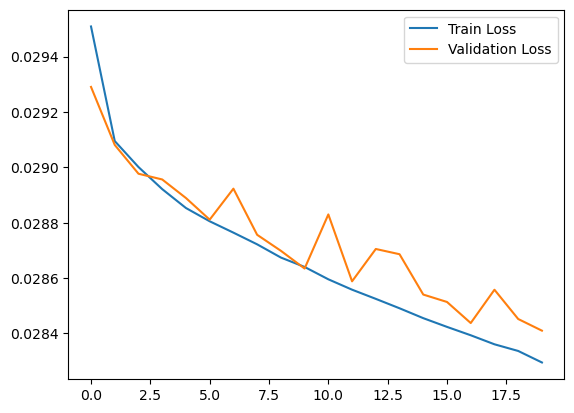

In [20]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# 학습 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


3822/3822 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0284
Test Loss: 0.02840459905564785
3822/3822 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


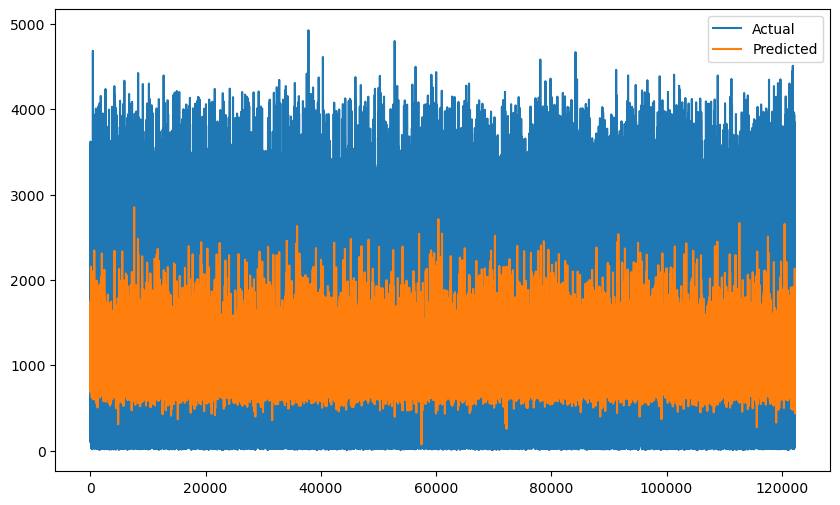

In [21]:
# 테스트 데이터 평가
loss = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

# 예측
y_pred = model.predict(x_test)

# 스케일 복원
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.show()


#### gunja_station ver2

In [23]:
region_code = pd.read_csv('Rate.csv')
region_code.head()

,CATEGORY,AREA_CD,AREA_NM,TOT_REG_CD,ADM_NM,ADM_CD,REG_AREA,AREA,RATE,Area to st,Area to _1
0,인구밀집지역,POI013,가산디지털단지역,1118051010001,가산동,1118051,23090.98,23088.446,1.0,437.0,광명
1,인구밀집지역,POI013,가산디지털단지역,1118051010003,가산동,1118051,215886.15,215871.596,1.0,437.0,광명
2,인구밀집지역,POI013,가산디지털단지역,1118051010002,가산동,1118051,15779.28,15778.026,1.0,437.0,광명
3,인구밀집지역,POI013,가산디지털단지역,1118051010004,가산동,1118051,18596.58,18595.490,1.0,437.0,광명
4,인구밀집지역,POI013,가산디지털단지역,1118051020002,가산동,1118051,736729.26,736705.000,1.0,437.0,광명


In [24]:
area = ['삼각지역', '군자역', '회기역', '용산역']
cols = ['TOT_REG_CD','AREA_NM', 'ADM_CD', 'RATE']
region_code_edit = region_code.loc[region_code['AREA_NM']=='군자역', cols]
region_code_edit

,TOT_REG_CD,AREA_NM,ADM_CD,RATE
61,1105054010001,군자역,1105054,1.000
62,1105054010002,군자역,1105054,0.489
63,1105054030003,군자역,1105054,0.761
64,1105054030009,군자역,1105054,1.000
65,1105055020004,군자역,1105055,0.647
66,1105056020032,군자역,1105056,0.882
67,1105056020028,군자역,1105056,1.000
68,1105056020007,군자역,1105056,0.537
69,1105056020003,군자역,1105056,0.327
70,1105059010019,군자역,1105059,0.791


In [26]:
df = LPD_df.copy()

In [30]:
merged_df = pd.merge(region_code_edit, LPD_df, left_on='TOT_REG_CD', right_on='집계구코드')

# 3. RATE를 곱할 컬럼들 선택
gen_columns = [col for col in merged_df.columns if 'gen' in col]

# 4. 선택된 컬럼에 RATE 곱하기
for col in gen_columns:
    merged_df[f'{col}_adjusted'] = merged_df[col] * merged_df['RATE']
    
merged_df[['TOT_REG_CD', 'AREA_NM', 'RATE', 'Datetime', '10gen_male', '20gen_male', '10gen_male_adjusted', '20gen_male_adjusted']]


,TOT_REG_CD,AREA_NM,RATE,Datetime,10gen_male,20gen_male,10gen_male_adjusted,20gen_male_adjusted
0,1105054010001,군자역,1.000,20200101160000,22.0000,82.0000,22.000000,82.000000
1,1105054010001,군자역,1.000,20200101150000,18.0000,73.0000,18.000000,73.000000
2,1105054010001,군자역,1.000,20200101170000,19.0000,84.0000,19.000000,84.000000
3,1105054010001,군자역,1.000,20200101130000,10.0000,70.0000,10.000000,70.000000
4,1105054010001,군자역,1.000,20200101120000,9.0000,60.0000,9.000000,60.000000
...,...,...,...,...,...,...,...,...
611515,1105059010016,군자역,0.386,20241231090000,4.1887,25.6648,1.616838,9.906613
611516,1105059010016,군자역,0.386,20241231110000,0.0000,20.8897,0.000000,8.063424
611517,1105059010016,군자역,0.386,20241231070000,12.3706,47.7795,4.775052,18.442887
611518,1105059010016,군자역,0.386,20241231060000,13.4030,62.1035,5.173558,23.971951


In [33]:
df = merged_df.copy()
df_g2 = df.copy()
# 필요한 열만 사용
code = [
    1105054010001, 1105054010002, 1105054030003, 1105054030009, 1105055020004,
    1105056020003, 1105056020007, 1105056020028, 1105056020032, 1105059010012,
    1105059010013, 1105059010014, 1105059010016, 1105059010019
]

# '집계구코드' 필터링
df_g2 = df_g2[df_g2['집계구코드'].isin(code)]
df_g2 = df_g2[['Datetime', 'TOT_REG_CD', '집계구코드', '10gen_male_adjusted', '10gen_female_adjusted', '20gen_male_adjusted', '20gen_female_adjusted', '30gen_male_adjusted',
               '30gen_female_adjusted', '40gen_male_adjusted', '40gen_female_adjusted', '50gen_male_adjusted', '50gen_female_adjusted', '60gen_male_adjusted', '60gen_female_adjusted', '총생활인구수']]  # Datetime은 시간 정보, '총생활인구수'는 예측 대상

# Datetime을 시계열 데이터로 변환
df_g2['Datetime'] = pd.to_datetime(df_g2['Datetime'], format='%Y%m%d%H%M%S')

# 데이터 정렬 (시간 순서)
df_g2 = df_g2.sort_values(by='Datetime')

# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
df_g2['총생활인구수'] = scaler.fit_transform(df_g2[['총생활인구수']])

# 시계열 데이터로 변환하는 함수 정의
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

# 시계열 데이터 생성
time_steps = 14  # 과거 10개의 데이터로 다음 값을 예측
x, y = create_sequences(df_g2['총생활인구수'].values, time_steps)

# 학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LSTM 입력 형태 확인
print(f"x_train shape: {x_train.shape}")  # (샘플 수, 시간 스텝, 특징 수)
print(f"y_train shape: {y_train.shape}")

x_train shape: (489204, 14)
y_train shape: (489204,)


In [34]:
# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(time_steps, 1)),  # 입력: (time_steps, 1)
    Dense(1)  # 출력: 총생활인구수
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 요약
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.0298 - val_loss: 0.0292
Epoch 2/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0291 - val_loss: 0.0288
Epoch 3/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0290 - val_loss: 0.0287
Epoch 4/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 5/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - loss: 0.0288 - val_loss: 0.0287
Epoch 6/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0289 - val_loss: 0.0287
Epoch 7/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 8/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - loss: 0.0289 - val_loss: 0.0286
Epoch 9/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 0.0286 - val_loss: 0.0287
Epoch 10/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 0.0288 - val_loss: 0.0286
Epoch 11/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 0.0289 - val_loss: 0.02

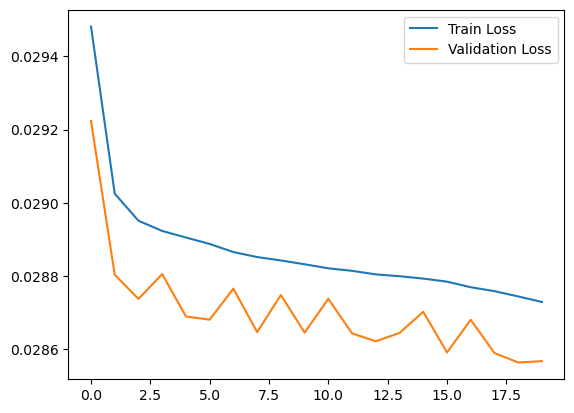

In [35]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# 학습 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

3822/3822 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0289
Test Loss: 0.02892901375889778
3822/3822 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


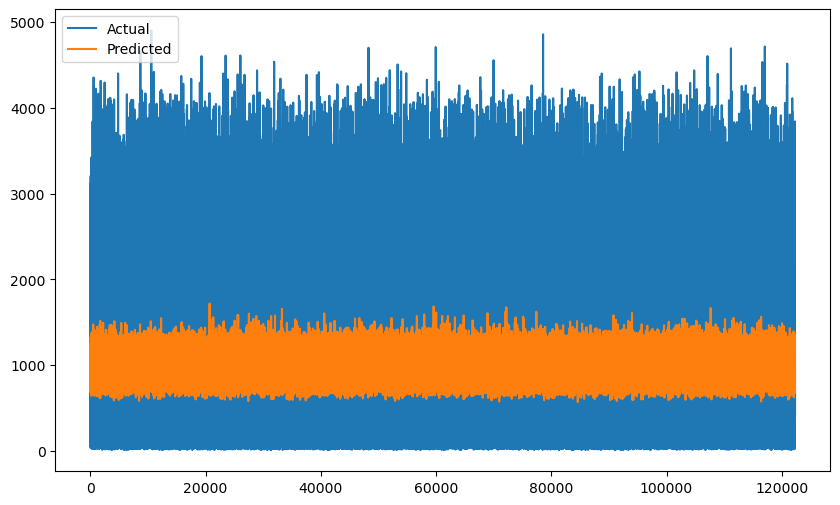

In [36]:
# 학습 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 테스트 데이터 평가
loss = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

# 예측
y_pred = model.predict(x_test)

# 스케일 복원
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.show()


#### gunja_station ver3

In [18]:
region_code = pd.read_csv('Rate.csv')

area = ['삼각지역', '군자역', '회기역', '용산역']
cols = ['TOT_REG_CD','AREA_NM', 'ADM_CD', 'RATE']
region_code_edit = region_code.loc[region_code['AREA_NM']=='군자역', cols]


In [34]:
merged_df = pd.merge(region_code_edit, LPD_df, left_on='TOT_REG_CD', right_on='집계구코드')

# 3. RATE를 곱할 컬럼들 선택
gen_columns = [col for col in merged_df.columns if 'gen' in col]

# 4. 선택된 컬럼에 RATE 곱하기
for col in gen_columns:
    merged_df[f'{col}_adjusted'] = merged_df[col] * merged_df['RATE']
    
# 사용할 데이터프레임
df_g2 = merged_df.copy()

df_g2 = df_g2[['Datetime', 'TOT_REG_CD', '집계구코드', '10gen_male_adjusted', '10gen_female_adjusted', '20gen_male_adjusted', '20gen_female_adjusted', '30gen_male_adjusted',
               '30gen_female_adjusted', '40gen_male_adjusted', '40gen_female_adjusted', '50gen_male_adjusted', '50gen_female_adjusted', '60gen_male_adjusted', '60gen_female_adjusted', '총생활인구수']]  # Datetime은 시간 정보, '총생활인구수'는 예측 대상

# Datetime을 시계열 데이터로 변환
df_g2['Datetime'] = pd.to_datetime(df_g2['Datetime'], format='%Y%m%d%H%M%S')
df_g2 = df_g2.sort_values(by='Datetime')

features = df_g2.iloc[:, 3:15].values

# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
scalerd_f= scaler.fit_transform(features)

# 시계열 데이터로 변환하는 함수 정의
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

# 시계열 데이터 생성(24)
time_steps = 14
x, y = create_sequences(scalerd_f, time_steps)

# 학습/테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LSTM 입력 형태 확인
print(f"x_train shape: {x_train.shape}")  # (샘플 수, 시간 스텝, 특징 수)
print(f"y_train shape: {y_train.shape}")


x_train shape: (489204, 14, 12)
y_train shape: (489204, 12)


In [35]:
# LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(time_steps, 12)), 
    Dense(12)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 요약
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,212 (51.61 KB)

 Trainable params: 13,212 (51.61 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 예측
def predict_next(model, last_sequence):
    scaled_prediction = model.predict(np.array([last_sequence]))
    prediction = scaler.inverse_transform(scaled_prediction)
    return prediction


Epoch 1/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - loss: 0.0249 - val_loss: 0.0242
Epoch 2/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 99s 8ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 3/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 0.0241 - val_loss: 0.0245
Epoch 4/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - loss: 0.0240 - val_loss: 0.0239
Epoch 5/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 0.0240 - val_loss: 0.0238
Epoch 6/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 0.0239 - val_loss: 0.0241
Epoch 7/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - loss: 0.0239 - val_loss: 0.0238
Epoch 8/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 0.0239 - val_loss: 0.0237
Epoch 9/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - loss: 0.0239 - val_loss: 0.0238
Epoch 10/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - loss: 0.0239 - val_loss: 0.0239
Epoch 11/20
12231/12231 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 0.0238 - val_loss: 0.02

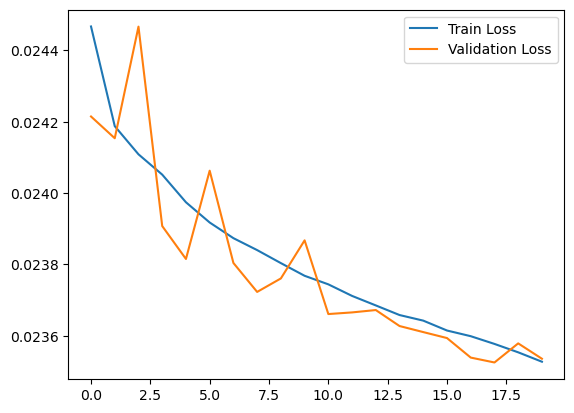

3822/3822 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0237
Test Loss: 0.023711122572422028
3822/3822 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


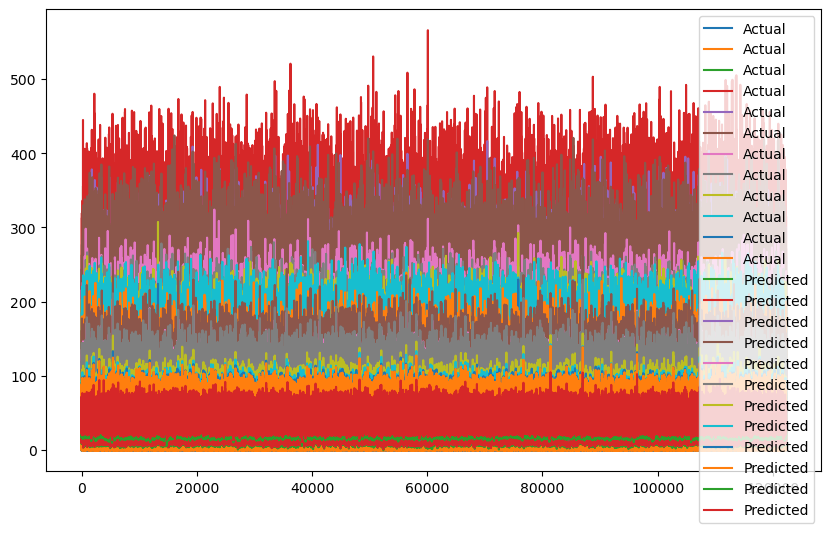

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 테스트 데이터 평가
loss = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

